In [71]:
import numpy as np
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data import Subset
from torch.utils.data import random_split
from torchvision import datasets
import torch
import torch.nn as nn
import torch.nn.functional as F
from matplotlib import pyplot as plt
from PIL import Image
import os
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold


import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
import torch.optim as optim
from torchvision import transforms
import datetime

In [72]:
dir = r"C:\Users\bches\Classes\Spring_2021\Pattern_Recognition\Project\code\losses"

baseline_net_train_loss = np.load(dir+r'\baseline_net_train_loss.npy')
baseline_net_val_loss = np.load(dir+r'\baseline_net_val_loss.npy', allow_pickle=True)

baseline_aug_train_loss = np.load(dir+r'\baseline_aug_train_loss.npy')
baseline_aug_val_loss = np.load(dir+r'\baseline_aug_val_loss.npy', allow_pickle=True)


baseline_net_dp_train_loss = np.load(dir+r'\baseline_net_dp_train_loss.npy')
baseline_net_dp_val_loss = np.load(dir+r'\baseline_net_dp_val_loss.npy', allow_pickle=True)

baseline_net_deep_train_loss = np.load(dir+r'\baseline_net_deep_train_loss.npy')
baseline_net_deep_val_loss = np.load(dir+r'\baseline_net_deep_val_loss.npy', allow_pickle=True)

baseline_net_bn_train_loss = np.load(dir+r'\baseline_net_bn_train_loss.npy')
baseline_net_bn_val_loss = np.load(dir+r'\baseline_net_bn_val_loss.npy', allow_pickle=True)

baseline_dp_aug_train_loss = np.load(dir+r'\baseline_dp_aug_train_loss.npy')
baseline_dp_aug_val_loss = np.load(dir+r'\baseline_dp_aug_val_loss.npy', allow_pickle=True)

baseline_deeper_aug_bn_train_loss = np.load(dir+r'\baseline_deeper_aug_bn_train_loss.npy')
baseline_deeper_aug_bn_val_loss = np.load(dir+r'\baseline_deeper_aug_bn_val_loss.npy', allow_pickle=True)

print(np.shape(baseline_deeper_aug_bn_train_loss))

epochs = np.shape(baseline_net_train_loss)[0]
epochs = np.arange(0, epochs)

(500,)


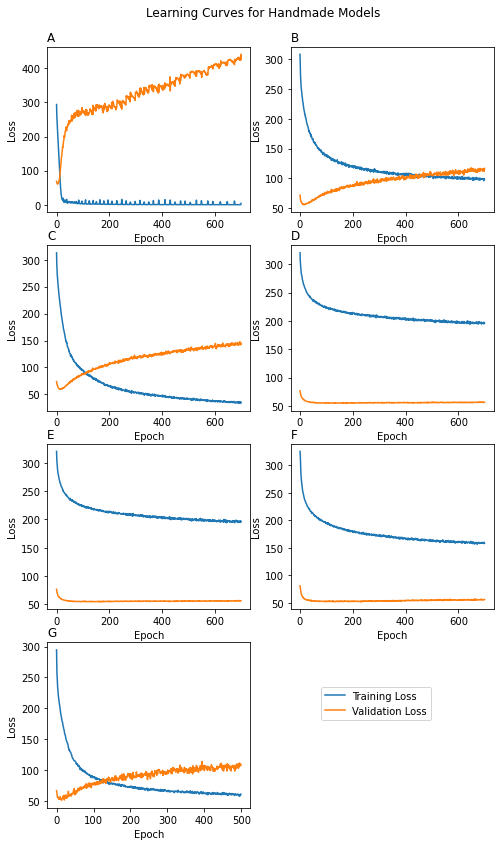

In [73]:
fig, ax = plt.subplots(4,2)
fig.set_size_inches(8, 14)
fig.suptitle("Learning Curves for Handmade Models", y=0.92)

ax[0,0].plot(epochs, baseline_net_train_loss)
ax[0,0].plot(epochs, baseline_net_val_loss)
ax[0,0].set_title("A", loc='left')
ax[0,0].set_xlabel("Epoch")
ax[0,0].set_ylabel("Loss")

ax[0,1].plot(epochs, baseline_aug_train_loss)
ax[0,1].plot(epochs, baseline_aug_val_loss)
ax[0,1].set_title("B",loc='left')
ax[0,1].set_xlabel("Epoch")
ax[0,1].set_ylabel("Loss")

ax[1,0].plot(epochs, baseline_net_dp_train_loss)
ax[1,0].plot(epochs, baseline_net_dp_val_loss)
ax[1,0].set_title("C",loc='left')
ax[1,0].set_xlabel("Epoch")
ax[1,0].set_ylabel("Loss")

ax[1,1].plot(epochs, baseline_dp_aug_train_loss)
ax[1,1].plot(epochs, baseline_dp_aug_val_loss)
ax[1,1].set_title("D",loc='left')
ax[1,1].set_xlabel("Epoch")
ax[1,1].set_ylabel("Loss")

ax[2,0].plot(epochs, baseline_dp_aug_train_loss)
ax[2,0].plot(epochs, baseline_dp_aug_val_loss)
ax[2,0].set_title("E",loc='left')
ax[2,0].set_xlabel("Epoch")
ax[2,0].set_ylabel("Loss")

ax[2,1].plot(epochs, baseline_net_deep_train_loss)
ax[2,1].plot(epochs, baseline_net_deep_val_loss)
ax[2,1].set_title("F",loc='left')
ax[2,1].set_xlabel("Epoch")
ax[2,1].set_ylabel("Loss")


ax[3,0].plot(epochs[0:500], baseline_deeper_aug_bn_train_loss)
ax[3,0].plot(epochs[0:500], baseline_deeper_aug_bn_val_loss)
ax[3,0].set_title("G",loc='left')
ax[3,0].set_xlabel("Epoch")
ax[3,0].set_ylabel("Loss")
fig.legend(["Training Loss", "Validation Loss"],loc=1, bbox_to_anchor = (0.8, 0.25))

plt.delaxes(ax[3,1])

plt.savefig("hand made model learning curves")

In [74]:
dir = r"C:\Users\bches\Classes\Spring_2021\Pattern_Recognition\Project\code\losses"

alexnet_48_wd_train_loss = np.load(dir+r'\alexnet_48_wd_train_loss.npy')
alexnet_48_wd_val_loss = np.load(dir+r'\alexnet_48_wd_val_loss.npy', allow_pickle=True)

lenet_48_wd_train_loss = np.load(dir+r'\lenet_48_wd_train_loss.npy')
lenet_48_wd_val_loss = np.load(dir+r'\lenet_48_wd_val_loss.npy', allow_pickle=True)

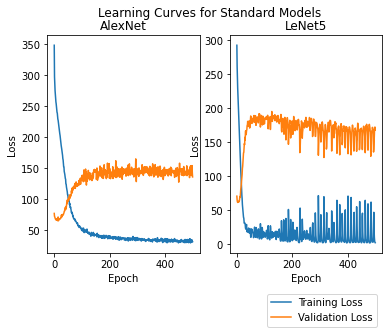

In [75]:
fig, ax = plt.subplots(1,2)
#fig.set_size_inches(8, 14)
fig.suptitle("Learning Curves for Standard Models")
epochs = np.shape(alexnet_48_wd_train_loss)[0]
epochs = np.arange(0, epochs)
ax[0].plot(epochs, alexnet_48_wd_train_loss)
ax[0].plot(epochs, alexnet_48_wd_val_loss)
ax[0].set_title("AlexNet")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")

ax[1].plot(epochs, lenet_48_wd_train_loss)
ax[1].plot(epochs, lenet_48_wd_val_loss)
ax[1].set_title("LeNet5")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Loss")
fig.legend(["Training Loss", "Validation Loss"],loc=1, bbox_to_anchor = (0.9, 0))


In [76]:
dir = r"C:\Users\bches\Classes\Spring_2021\Pattern_Recognition\Project\code\losses"

deep_emotion_v1_train_loss = np.load(dir+r'\deep_emotion_v1_train_loss.npy')
deep_emotion_v1_val_loss_t = np.load(dir+r'\deep_emotion_v1_val_loss.npy', allow_pickle=True)

dexp_train_loss = np.load(dir+r'\dexpression_baseline_48_train_loss.npy')
dexp_val_loss_t = np.load(dir+r'\dexpression_baseline_48_val_loss.npy', allow_pickle=True)
print(dexp_val_loss_t)
dexp_val_loss = np.zeros(np.shape(dexp_val_loss_t))
for i in range(0, dexp_val_loss_t.shape[0]):
    #print(dexp_val_loss_t[i])
    dexp_val_loss[i] = dexp_val_loss_t[i].data
    
    
deep_emotion_v1_val_loss = np.zeros(np.shape(deep_emotion_v1_val_loss_t))

for i in range(0, deep_emotion_v1_val_loss_t.shape[0]):
    #print(deep_emotion_v1_val_loss_t[i])
    deep_emotion_v1_val_loss[i] = deep_emotion_v1_val_loss_t[i].data
    
#print(dexp_val_loss)
print(dexp_train_loss.shape, dexp_val_loss.shape)
print(deep_emotion_v1_train_loss.shape, deep_emotion_v1_val_loss.shape)

num_loop_dexp = int(dexp_val_loss.shape[0]/dexp_train_loss.shape[0])
num_loop_deep = int(deep_emotion_v1_val_loss.shape[0]/deep_emotion_v1_train_loss.shape[0])

#print(num_loop_dexp, num_loop_deep)
#print(deep_emotion_v1_val_loss)
#print(dexp_train_loss)
sum_dexp = 0
dexp_val_loss_real = []



for i in range(0, dexp_train_loss.shape[0]):
    #print("train loss: ", dexp_train_loss[i])
    reg_of_int = dexp_val_loss[i*num_loop_dexp : (i+1)*num_loop_dexp]    
    dexp_val_loss_real.append(reg_of_int[0])
    #print("val loss: ",dexp_val_loss_real[i])

deep_val_loss_real = []
for i in range(0, deep_emotion_v1_train_loss.shape[0]):
    reg_of_int = deep_emotion_v1_val_loss[i*num_loop_deep : (i+1)*num_loop_deep]
    deep_val_loss_real.append(reg_of_int[0])

    
print(len(dexp_val_loss_real))
print(len(deep_val_loss_real))

[tensor(1295.7762, device='cuda:0') tensor(1295.7762, device='cuda:0')
 tensor(1295.7762, device='cuda:0') ... tensor(1284.3618, device='cuda:0')
 tensor(1284.3618, device='cuda:0') tensor(1284.3618, device='cuda:0')]
(150,) (107700,)
(500,) (22500,)
150
500


[1295.7762451171875, 1238.472900390625, 1189.5123291015625, 1150.0040283203125, 1126.646484375, 1094.5361328125, 1118.8421630859375, 1079.883056640625, 1068.059814453125, 1060.547119140625, 1081.9185791015625, 1057.9205322265625, 1052.6707763671875, 1045.90185546875, 1039.5860595703125, 1036.9368896484375, 1043.2213134765625, 1026.7674560546875, 1032.4195556640625, 1018.8139038085938, 1038.186279296875, 1024.0943603515625, 1017.1511840820312, 1010.3689575195312, 1020.25390625, 1013.6610107421875, 1005.3692626953125, 1000.8241577148438, 1031.464111328125, 1010.7677001953125, 1014.6455078125, 1028.8153076171875, 1007.8250732421875, 1011.9617919921875, 1006.8196411132812, 1015.222900390625, 1018.6422119140625, 1028.6136474609375, 995.4898681640625, 1015.8220825195312, 1029.7584228515625, 1003.5621337890625, 1010.076171875, 1007.1162109375, 1009.1649169921875, 1019.3644409179688, 996.8441772460938, 1048.5950927734375, 1002.7236938476562, 1048.0574951171875, 1052.15673828125, 1073.919677734

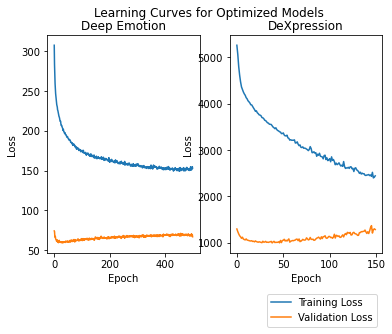

In [77]:

print(dexp_val_loss_real)
print(deep_emotion_v1_val_loss.shape)
fig, ax = plt.subplots(1,2)
#fig.set_size_inches(8, 14)
fig.suptitle("Learning Curves for Optimized Models")
epochs = np.shape(deep_emotion_v1_train_loss)[0]
epochs = np.arange(0, epochs)
ax[0].plot(epochs, deep_emotion_v1_train_loss)
ax[0].plot(epochs, deep_val_loss_real)
ax[0].set_title("Deep Emotion")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")

epochs = np.shape(dexp_train_loss)[0]
epochs = np.arange(0, epochs)
ax[1].plot(epochs, dexp_train_loss)
ax[1].plot(epochs, dexp_val_loss_real)
ax[1].set_title("DeXpression")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Loss")

fig.legend(["Training Loss", "Validation Loss"],loc=1, bbox_to_anchor = (0.9, 0))
plt.savefig("special model learning curves")

In [78]:

class Deep_Emotion(nn.Module):
    def __init__(self):
        '''
        Deep_Emotion class contains the network architecture.
        '''
        super(Deep_Emotion,self).__init__()
        self.conv1 = nn.Conv2d(1,10,3)
        self.conv2 = nn.Conv2d(10,10,3)
        self.pool2 = nn.MaxPool2d(2,2)

        self.conv3 = nn.Conv2d(10,10,3)
        self.conv4 = nn.Conv2d(10,10,3)
        self.pool4 = nn.MaxPool2d(2,2)

        self.norm = nn.BatchNorm2d(10)

        self.fc1 = nn.Linear(810,50)
        self.fc2 = nn.Linear(50,7)


        self.localization = nn.Sequential(
            nn.Conv2d(1, 8, kernel_size=7),
            nn.MaxPool2d(2, stride=2),
            nn.ReLU(True),
            nn.Conv2d(8, 10, kernel_size=5),
            nn.MaxPool2d(2, stride=2),
            nn.ReLU(True)
        )

        self.fc_loc = nn.Sequential(
            nn.Linear(640, 32),
            nn.ReLU(True),
            nn.Linear(32, 3 * 2)
        )
        self.fc_loc[2].weight.data.zero_()
        self.fc_loc[2].bias.data.copy_(torch.tensor([1, 0, 0, 0, 1, 0], dtype=torch.float))

    def stn(self, x):
        xs = self.localization(x)
        xs = xs.view(-1, 640)
        theta = self.fc_loc(xs)
        theta = theta.view(-1, 2, 3)

        grid = F.affine_grid(theta, x.size())
        x = F.grid_sample(x, grid)
        return x

    def forward(self,input):
        out = self.stn(input)

        out = F.relu(self.conv1(out))
        out = self.conv2(out)
        out = F.relu(self.pool2(out))

        out = F.relu(self.conv3(out))
        out = self.norm(self.conv4(out))
        out = F.relu(self.pool4(out))

        out = F.dropout(out)
        out = out.view(-1, 810)
        out = F.relu(self.fc1(out))
        out = self.fc2(out)

        #print(self.fc1.params.shape, self.fc2.params.shape, self.fc1.params)

        return out


In [79]:
#data set class definition

class my_dataset(Dataset):
    def __init__(self, X, y, transform = None):
        self.data = X
        self.target = y
        self.transform = transform
        
        if torch.cuda.is_available():
            print("Data placed in GPU memory")
            self.data = self.data.cuda()
            self.target = self.target.cuda()
            
    def __getitem__(self, index):
        x = self.data[index]
        y = self.target[index]
        if self.transform:
            x = self.transform(x)
        
        if torch.cuda.is_available():
            return x.cuda(), y.cuda()
        
        return x,y
        
    def __len__(self):
        return len(self.data)
    

In [80]:
model = Deep_Emotion()
model.load_state_dict(torch.load(r"C:\Users\bches\Classes\Spring_2021\Pattern_Recognition\Project\code\losses\deep_emotion_v1.pt"))

model.eval()
model.to("cuda:0")
X_val = np.load(r"C:\Users\bches\Classes\Spring_2021\Pattern_Recognition\Project\datasets\FER2013\train\X_val.npy")
y_val = np.load(r"C:\Users\bches\Classes\Spring_2021\Pattern_Recognition\Project\datasets\FER2013\train\y_val.npy")


val_transform = torchvision.transforms.Compose([
            #torchvision.ToPILImage(), #need this to do data augmentation, only accepts PIL images
            #torchvision.transforms.Resize(48), #48 is FER2013 size
            #torchvision.transforms.ToTensor(),
            transforms.Normalize(mean=0.5076, std=0.2548)
])
X_val_t = torch.tensor(X_val.tolist(), dtype=torch.float32)/255
X_val_t = X_val_t.unsqueeze(1).contiguous()
y_val_t = torch.tensor(y_val.tolist(), dtype=torch.long)

val_dataset = my_dataset(X_val_t, y_val_t, transform=val_transform)
X_val_t = X_val_t.unsqueeze(1).contiguous()


Data placed in GPU memory


In [81]:
total = 0
correct = 0
pred_all = []
label_all = []
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=1, shuffle=False)

with torch.no_grad():
    model.eval()
    for imgs1, label in val_loader:
        outputs1 = model(imgs1)
                #print(outputs1)
        _, pred = torch.max(outputs1, dim=1)
        pred_all.append(pred.data.tolist()[0])
        total += label.shape[0]
        #print(pred==label)
        ##print(pred)
        #print(label)
        label_all.append(label.data.tolist()[0])
        correct += (pred == label).sum()
        #val_loss += loss_fn(outputs1, label)
        #val_errors.append(val_loss)
print("Validation accuracy: ", 100*correct/total)
        
        #if epoch == 1 or epoch % 10 == 0:
        #      print('{} Epoch {}, Training loss {}, Training accuracy {} Validation accuracy {}'.format(datetime.datetime.now(), epoch, float(loss_train), float(100*correct_train/total_train), float(100*correct/total)))

C:\Users\bches\Anaconda3\lib\site-packages\torch\nn\functional.py:3448: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "
C:\Users\bches\Anaconda3\lib\site-packages\torch\nn\functional.py:3385: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


Validation accuracy:  tensor(50.5051, device='cuda:0')


In [82]:
len(pred_all), len(label_all)

(5742, 5742)

In [83]:
label_all

[0,
 5,
 6,
 4,
 5,
 2,
 0,
 3,
 5,
 4,
 5,
 4,
 0,
 6,
 0,
 3,
 3,
 3,
 4,
 4,
 4,
 2,
 5,
 4,
 3,
 5,
 4,
 2,
 3,
 6,
 3,
 3,
 0,
 2,
 4,
 0,
 4,
 6,
 0,
 0,
 2,
 5,
 0,
 5,
 3,
 0,
 5,
 4,
 4,
 0,
 2,
 5,
 6,
 4,
 5,
 5,
 2,
 0,
 4,
 0,
 3,
 2,
 6,
 0,
 3,
 4,
 2,
 2,
 0,
 5,
 0,
 3,
 4,
 2,
 1,
 3,
 3,
 5,
 5,
 3,
 0,
 6,
 0,
 5,
 5,
 3,
 4,
 2,
 2,
 2,
 6,
 5,
 2,
 4,
 4,
 3,
 4,
 3,
 6,
 6,
 5,
 3,
 0,
 3,
 5,
 6,
 3,
 6,
 3,
 3,
 0,
 5,
 3,
 2,
 2,
 6,
 5,
 5,
 3,
 0,
 3,
 2,
 4,
 3,
 6,
 5,
 0,
 0,
 4,
 2,
 2,
 4,
 2,
 5,
 5,
 4,
 6,
 3,
 2,
 5,
 6,
 3,
 2,
 4,
 2,
 2,
 5,
 6,
 2,
 3,
 1,
 3,
 0,
 2,
 3,
 3,
 2,
 4,
 4,
 5,
 2,
 6,
 2,
 3,
 6,
 2,
 1,
 4,
 5,
 3,
 2,
 3,
 2,
 4,
 5,
 4,
 4,
 1,
 3,
 4,
 6,
 3,
 3,
 4,
 5,
 0,
 5,
 5,
 5,
 0,
 3,
 0,
 2,
 6,
 3,
 5,
 4,
 5,
 3,
 3,
 4,
 4,
 3,
 3,
 3,
 3,
 6,
 3,
 2,
 3,
 5,
 4,
 5,
 3,
 3,
 4,
 4,
 5,
 4,
 2,
 5,
 3,
 4,
 2,
 0,
 4,
 0,
 5,
 6,
 2,
 4,
 6,
 4,
 3,
 2,
 2,
 1,
 0,
 4,
 3,
 0,
 5,
 3,
 3,
 0,
 5,
 6,
 5,
 3,
 0,


In [84]:
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
accuracy_score(label_all, pred_all), len(label_all), len(pred_all)

(0.5050505050505051, 5742, 5742)

Text(0.5, 1.0, 'Confusion Matrix for Deep Emotion')

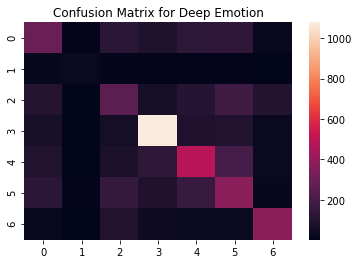

In [85]:
sns.heatmap(confusion_matrix(label_all, pred_all)).set_title("Confusion Matrix for Deep Emotion")


In [86]:
       
class baseline_net_bn_deeper(nn.Module):
    def __init__(self):
        super().__init__()
        self.use_cuda = torch.cuda.is_available()
        self.device = torch.device("cuda" if self.use_cuda else "cpu")
        print("model device:", self.device)
        
        self.conv1 = nn.Conv2d(1, 10, kernel_size = 3, padding = 1) 
        self.bn1 = nn.BatchNorm2d(num_features = 10)
        self.conv2 = nn.Conv2d(10, 32, kernel_size = 3, padding = 1) 
        self.bn2 = nn.BatchNorm2d(num_features = 32)

        self.conv3 = nn.Conv2d(32, 64, kernel_size = 3, padding = 1) 
        self.bn3 = nn.BatchNorm2d(num_features = 64)
        self.conv4 = nn.Conv2d(64, 128, kernel_size = 3, padding = 1)    
        self.bn4 = nn.BatchNorm2d(num_features = 128)
              
        self.conv5 = nn.Conv2d(128, 128, kernel_size = 3, padding = 1)         
        self.bn5 = nn.BatchNorm2d(num_features = 128)
        

        self.fc1 = nn.Linear(128, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 7) 


        
    def forward(self, x):
        out = self.bn1(self.conv1(x))
        out = F.max_pool2d(F.relu(out), kernel_size=2) #kernel of 2 for max pool
        out = self.bn2(self.conv2(out))
        out = F.max_pool2d(F.relu(out), 2)
        out = self.bn3(self.conv3(out))
        out = F.max_pool2d(F.relu(out), kernel_size=2) #kernel of 2 for max pool
        out = self.bn4(self.conv4(out))
        out = F.max_pool2d(F.relu(out), 2)
        
        out = self.bn5(self.conv5(out))
        out = F.max_pool2d(F.relu(out), 2)
        
       # print("out: ",out.shape)
        
        out = out.view(-1, 128)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return out


In [87]:
model = baseline_net_bn_deeper()
model.load_state_dict(torch.load(r"C:\Users\bches\Classes\Spring_2021\Pattern_Recognition\Project\code\losses\baseline_deeper_aug_bn.pt"))

model.eval()
model.to("cuda:0")
total = 0
correct = 0
pred_all = []
label_all = []
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=1, shuffle=False)

with torch.no_grad():
    model.eval()
    for imgs1, label in val_loader:
        outputs1 = model(imgs1)
                #print(outputs1)
        _, pred = torch.max(outputs1, dim=1)
        pred_all.append(pred.data.tolist()[0])
        total += label.shape[0]
        #print(pred==label)
        ##print(pred)
        #print(label)
        label_all.append(label.data.tolist()[0])
        correct += (pred == label).sum()
        #val_loss += loss_fn(outputs1, label)
        #val_errors.append(val_loss)
print("Validation accuracy: ", 100*correct/total)
        
        #if epoch == 1 or epoch % 10 == 0:
        #      print('{} Epoch {}, Training loss {}, Training accuracy {} Validation accuracy {}'.format(datetime.datetime.now(), epoch, float(loss_train), float(100*correct_train/total_train), float(100*correct/total)))

model device: cuda
Validation accuracy:  tensor(60.5190, device='cuda:0')


Text(0.5, 1.0, 'Confusion Matrix for Deepest Network')

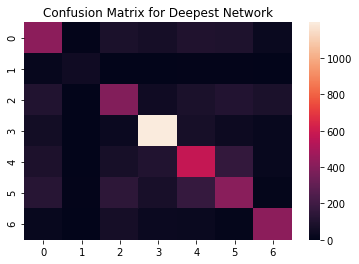

In [88]:
sns.heatmap(confusion_matrix(label_all, pred_all)).set_title("Confusion Matrix for Deepest Network")


In [89]:
import torch
import torch.nn as nn
import torch.nn.functional as F


# image pre-processor block
class Block1(nn.Module):
    def __init__(self):
        super(Block1, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=64, kernel_size=7, stride=2, padding=3)
        #self.pool = nn.MaxPool2d(kernel_size=3, stride=2)
        self.lrn = nn.LocalResponseNorm(size=2)

    def forward(self, x):
        #x = self.pool(F.relu(self.conv1(x)))
        x = (F.relu(self.conv1(x)))
        x = self.lrn(x)
        # print("BLOCK 1 = ", x.size())
        return x


# feature extractor block 1
class Block2(nn.Module):
    def __init__(self):
        super(Block2, self).__init__()
        self.conv2a = nn.Conv2d(in_channels=64, out_channels=96, kernel_size=1)
        self.pool2a = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.conv2b = nn.Conv2d(in_channels=96, out_channels=208, kernel_size=3, padding=1)
        self.conv2c = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=1)

        #self.conv2d = nn.Conv2d(in_channels = 96, out_channels =128, kernel_size=3, padding =1) #added by Brit Chesley 
        #self.pool2b = nn.MaxPool2d(kernel_size=3, stride=2, padding=0)
        self.padding = nn.ZeroPad2d((72, 72, 0, 0))

    def forward(self, x1):
        x2 = x1
        x1 = F.relu(self.conv2a(x1))
        #x3 = F.relu(self.conv2d(x1))
        x1 = F.relu(self.conv2b(x1))
        x2 = self.pool2a(x2)
        

        x2 = F.relu(self.conv2c(x2))

        #print("x1: ", x1.shape," x2:  ", x2.shape," x3: ", x3.shape)
        x2 = F.pad(x2, (0, 0, 0, 0, 72, 72))
        #x3 = F.pad(x3, (0, 0, 0, 0, 40, 40))
        #print("x1: ", x1.shape," x2:  ", x2.shape," x3: ", x3.shape)
        
        
        x4 = torch.cat((x1, x2))
        #print("x1: ", x1.shape," x2:  ", x2.shape," x3: ", x3.shape)
        #x3 = self.pool2b(x4)
        #print("BLOCK 2 = ", x4.size())
        return x4


# feature extractor block 2
class Block3(nn.Module):
    def __init__(self):
        super(Block3, self).__init__()
        self.conv3a = nn.Conv2d(in_channels=208, out_channels=96, kernel_size=1)
        self.pool3a = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.conv3b = nn.Conv2d(in_channels=96, out_channels=208, kernel_size=3, stride=1, padding=1)
        self.conv3c = nn.Conv2d(in_channels=208, out_channels=64, kernel_size=1)
        self.pool3b = nn.MaxPool2d(kernel_size=3, stride=2, padding=0)
        self.dropout = nn.Dropout(p=0.125)
        self.fc1 = nn.Linear(100672, 1024)
        #self.fc1 = nn.Linear(208*13*13*4, 1024)
        self.fc2 = nn.Linear(1024, 64)
        self.fc3 = nn.Linear(64, 7)

    def forward(self, x1):
        x2 = x1
        x1 = F.relu(self.conv3a(x1))
        x2 = self.pool3a(x2)
        x1 = F.relu(self.conv3b(x1))
        x2 = F.relu(self.conv3c(x2))
        x2 = F.pad(x2, (0, 0, 0, 0, 72, 72))
        x3 = torch.cat((x1, x2))
        x3 = self.pool3b(x3)
        #print("x3 shape: ",x3.shape)
        x3 = x3.view(-1, 100672)
        #x3 = x3.view(-1, 208*13*13*4)
        x3 = F.relu(self.fc1(x3))
        x3 = F.relu(self.fc2(x3))
        x3 = self.fc3(x3)
        #x3 = F.log_softmax(self.fc3(x3))   # we want to use softmax over here
        return x3




In [90]:

block1 = Block1()
block2 = Block2()
block3 = Block3()
model = nn.Sequential(block1, block2, block3)
model.load_state_dict(torch.load(r"C:\Users\bches\Classes\Spring_2021\Pattern_Recognition\Project\code\losses\dexpression_baseline_48.pt"))

model.eval()
model.to("cuda:0")
total = 0
correct = 0
pred_all = []
label_all = []
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=1, shuffle=False)

with torch.no_grad():
    model.eval()
    for imgs1, label in val_loader:
        outputs1 = model(imgs1)
                #print(outputs1)
        _, pred = torch.max(outputs1, dim=1)
        pred_all.append(pred.data.tolist()[0])
        total += label.shape[0]
        #print(pred==label)
        ##print(pred)
        #print(label)
        label_all.append(label.data.tolist()[0])
        correct += (pred == label).sum()
        #val_loss += loss_fn(outputs1, label)
        #val_errors.append(val_loss)
print("Validation accuracy: ", 100*correct/total)
        
        #if epoch == 1 or epoch % 10 == 0:
        #      print('{} Epoch {}, Training loss {}, Training accuracy {} Validation accuracy {}'.format(datetime.datetime.now(), epoch, float(loss_train), float(100*correct_train/total_train), float(100*correct/total)))

Validation accuracy:  tensor(47.0219, device='cuda:0')


Text(0.5, 1.0, 'Confusion Matrix for DeXpression')

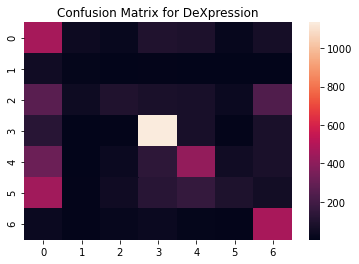

In [91]:
sns.heatmap(confusion_matrix(label_all, pred_all)).set_title("Confusion Matrix for DeXpression")
